In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
# set this so the graphs open internally
%matplotlib inline
import seaborn as sns

In [6]:
df = pd.read_csv('./StudentsPerformance.csv')
df.head (5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
girls = df[df["gender"]=="female"]
boys = df[df["gender"]=="male"]

Text(0.5, 1.0, 'Score distribution per Subjet and gender')

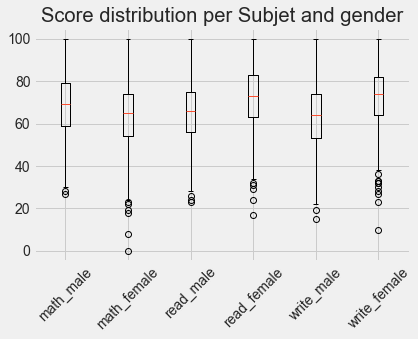

In [30]:
mathscores = [boys["math score"], girls["math score"]]
readingscores = [boys["reading score"], girls["reading score"]]
writingscores = [boys["writing score"], girls["writing score"]]

plt.boxplot(mathscores, positions=[1, 2], labels=['math_male', 'math_female'] )
plt.boxplot(readingscores, positions=[3, 4], labels=['read_male', 'read_female'])
plt.boxplot(writingscores, positions=[5, 6], labels=['write_male', 'write_female'])
plt.xticks(rotation=45)
plt.style.use("fivethirtyeight")
plt.title('Score distribution per Subjet and gender')

Text(0.5, 1.0, 'Distribution of scores per gender in Maths')

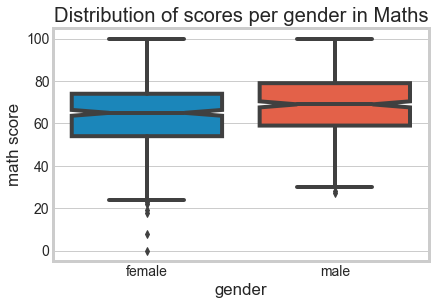

In [31]:
sns.set_style("whitegrid")
ax = sns.boxplot(x=df["gender"], y=df["math score"], notch=True)
plt.title('Distribution of scores per gender in Maths')

In [7]:
# Change the name of most of the columns
df_new = df.rename(columns={'gender':'Gender','race/ethnicity': 'RaceEthnicity', 'parental level of education':'paleEdu','test preparation course':'test-pcourse', 'math score':'mathscore', 'reading score':'readingscore', 'writing score':'writingscore' }) #, index={'ONE': 'one'}
# Rename Rows: none as "No Course" and completed as "Course"
df_new.loc[df_new['test-pcourse']=='completed', 'test-pcourse']='Course'
df_new.loc[df_new['test-pcourse']=='none', 'test-pcourse']='NO Course'
df_new.head()

,Gender,RaceEthnicity,paleEdu,lunch,test-pcourse,mathscore,readingscore,writingscore
0,female,group B,bachelor's degree,standard,NO Course,72,72,74
1,female,group C,some college,standard,Course,69,90,88
2,female,group B,master's degree,standard,NO Course,90,95,93
3,male,group A,associate's degree,free/reduced,NO Course,47,57,44
4,male,group C,some college,standard,NO Course,76,78,75


<function matplotlib.pyplot.show(*args, **kw)>

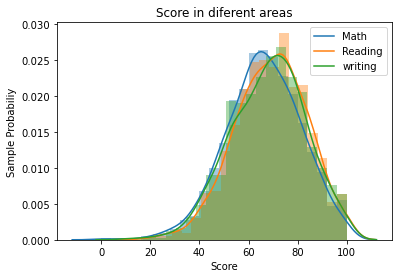

In [8]:
# would be nice to compare the score in diferent areas with parent level education
# First one
sns.distplot(df_new.mathscore, kde_kws={'label': 'Math'})
sns.distplot(df_new.readingscore, kde_kws={'label': 'Reading'})
sns.distplot(df_new.writingscore, kde_kws={'label': 'writing'})

plt.title ('Score in diferent areas') 
plt.xlabel('Score')
plt.ylabel('Sample Probabiliy')
plt.show

In [9]:
df_new.head()

,Gender,RaceEthnicity,paleEdu,lunch,test-pcourse,mathscore,readingscore,writingscore
0,female,group B,bachelor's degree,standard,NO Course,72,72,74
1,female,group C,some college,standard,Course,69,90,88
2,female,group B,master's degree,standard,NO Course,90,95,93
3,male,group A,associate's degree,free/reduced,NO Course,47,57,44
4,male,group C,some college,standard,NO Course,76,78,75


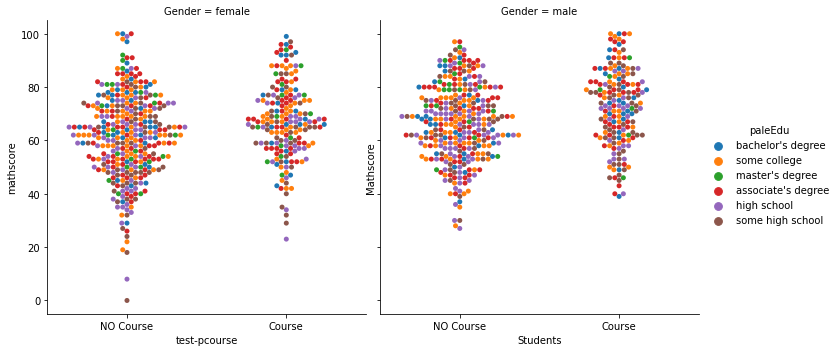

In [10]:
#second one
# Factor Plot
g = sns.catplot(x='test-pcourse', 
                   y='mathscore', 
                   data=df_new, 
                   hue='paleEdu',  # Color by parents level education
                   col='Gender',  # Separate by gender
                   kind='swarm') # Swarmplot 
# # Rotate x-axis labels
# g.set_xticklabels(rotation=-45)
#Labels
plt.xlabel('Students')  
plt.ylabel('Mathscore')
plt.show()


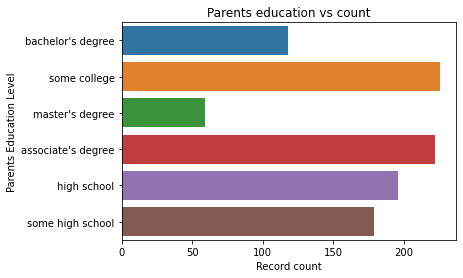

In [66]:
# third one
#plot bar about parents level educarion
sns.countplot(y='paleEdu', data=df_new)
plt.xlabel('Record count') # Amount of children whose parents have this education level 
plt.ylabel('Parents Education Level')
plt.title('Parents education vs count')
plt.show()

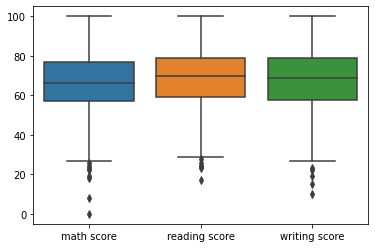

In [25]:
sns.boxplot(data=df)